<a href="https://colab.research.google.com/github/fatimabatooll/magic-dataset/blob/main/magic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Magic-dataset
- In this dataset there is just Gemma telescope we have high energy particles hitting the telescope there is a camera or detector that actually records certain patterns how this light hits the camera and we can use properties of those patterns in order to predict what type of particle cause that radiation whether its a Gemma particle or Hydron.

- https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [58]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fALpha', 'fDist', 'Class']
df = pd.read_csv('/content/drive/MyDrive/Machine Learning course 1/magic04.data', names=cols)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fALpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [59]:
df["Class"].unique()

array(['g', 'h'], dtype=object)

In [60]:
df['Class'] = (df['Class'] == "g").astype(int)

In [61]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fALpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


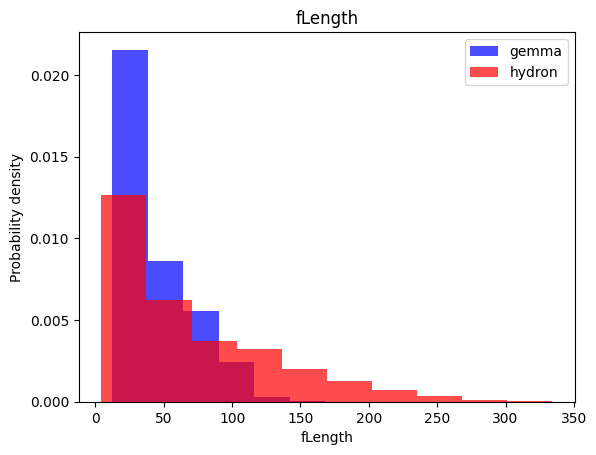

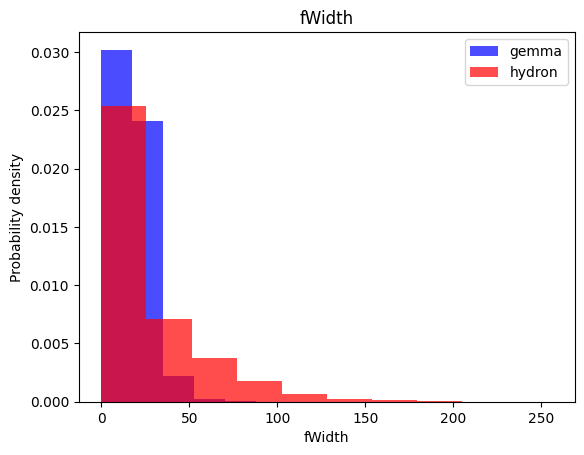

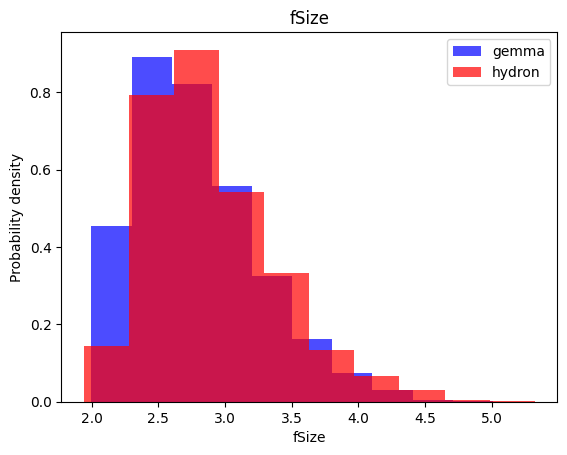

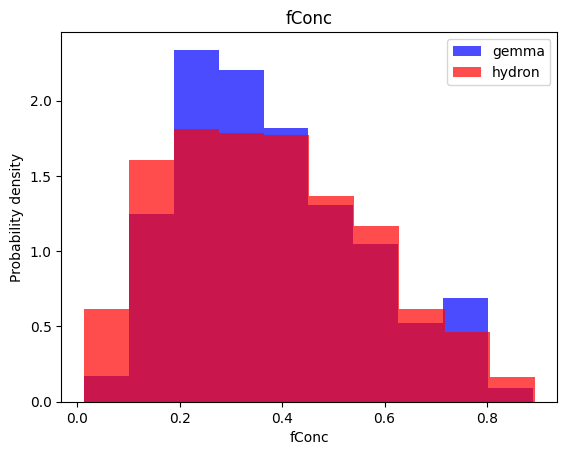

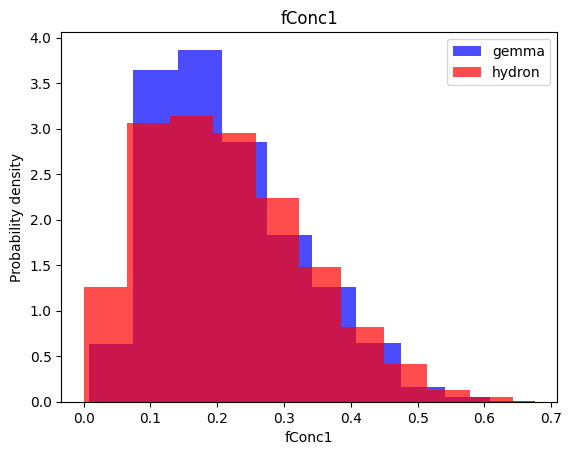

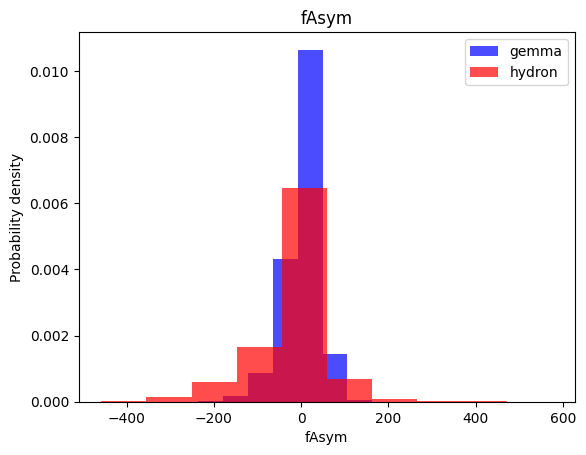

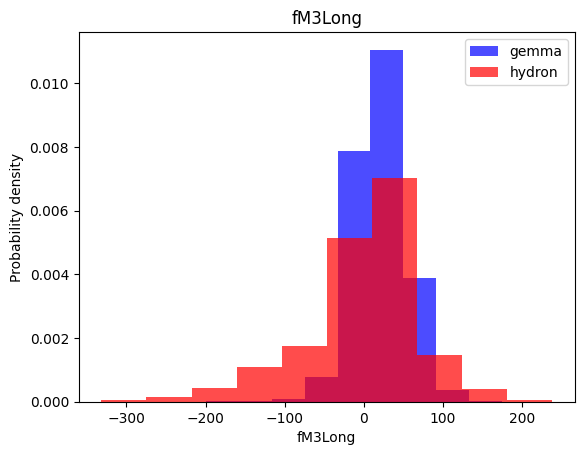

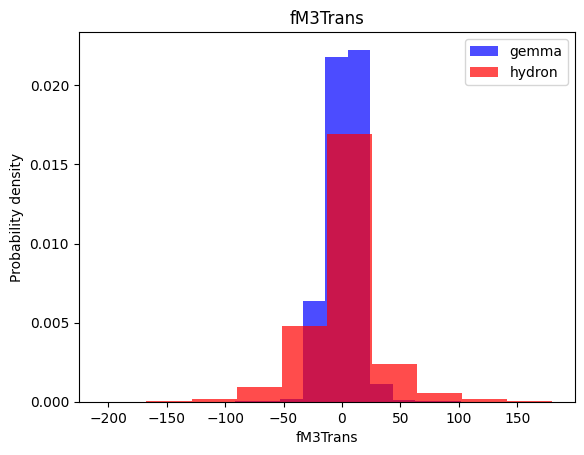

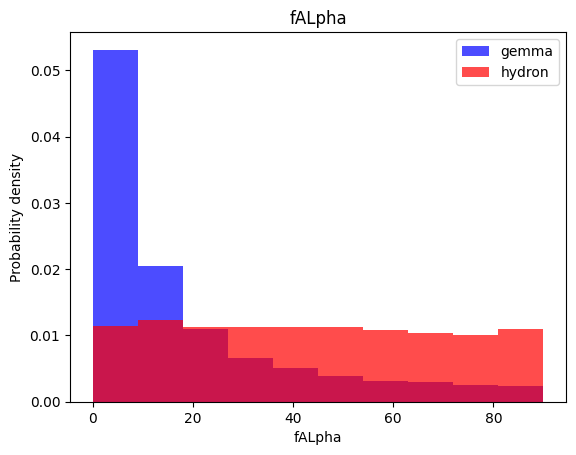

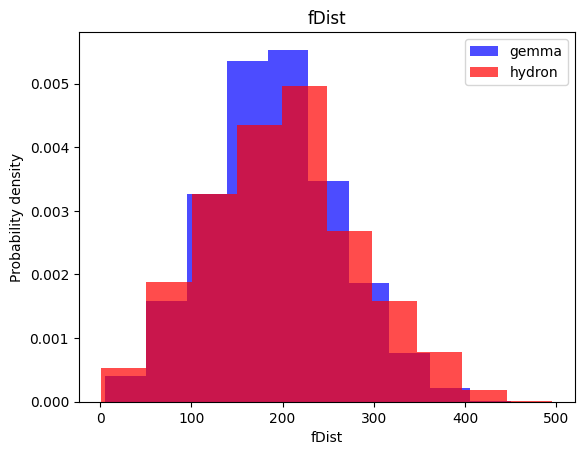

In [62]:
for label in cols[:-1]:
  plt.hist(df[df['Class']==1][label], color='blue', label='gemma', alpha=0.7, density=True)
  plt.hist(df[df['Class']==0][label], color='red', label='hydron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability density')
  plt.xlabel(label)
  plt.legend()
  plt.show()

### Train, validation, test datasets

In [63]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [64]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)
  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data,  X, y

In [65]:
print(len(train[train['Class']==1]))
print(len(train[train["Class"]==0]))

7422
3990


In [66]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [67]:
len(y_train)

14844

In [68]:
sum(y_train == 1)

np.int64(7422)

In [69]:
sum(y_train == 0)

np.int64(7422)

## KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [71]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [72]:
y_pred = knn_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [73]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [74]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1330
           1       0.82      0.88      0.85      2474

    accuracy                           0.80      3804
   macro avg       0.78      0.76      0.77      3804
weighted avg       0.80      0.80      0.80      3804



### Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [77]:
y_pred = nb_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [78]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.66      0.38      0.48      1330
           1       0.73      0.89      0.80      2474

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804



### Logistic Regression

parameters can be use for production level data adjusting panelties etc

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [81]:
y_pred = lg_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [82]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68      1330
           1       0.84      0.81      0.82      2474

    accuracy                           0.77      3804
   macro avg       0.75      0.76      0.75      3804
weighted avg       0.78      0.77      0.77      3804



### SVM

In [83]:
from sklearn.svm import SVC

In [84]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [85]:
y_pred = svm_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [86]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1330
           1       0.89      0.89      0.89      2474

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



### Neural Network ( a very basic guide through it )

In [87]:
import tensorflow as tf

In [88]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [89]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


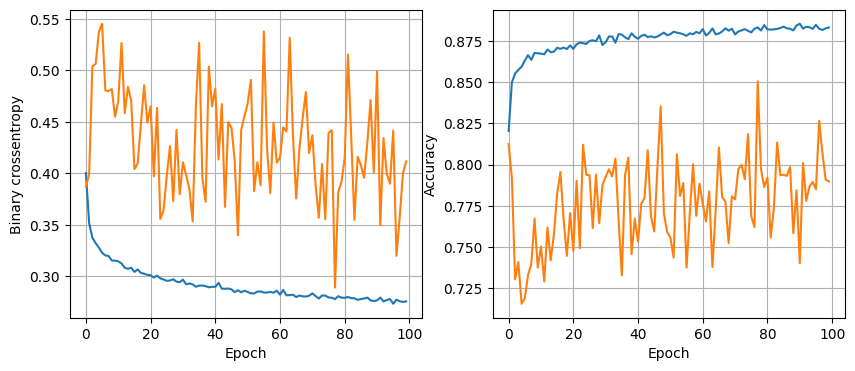

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3288
16 nodes, dropout 0, lr 0.01, batch size 64


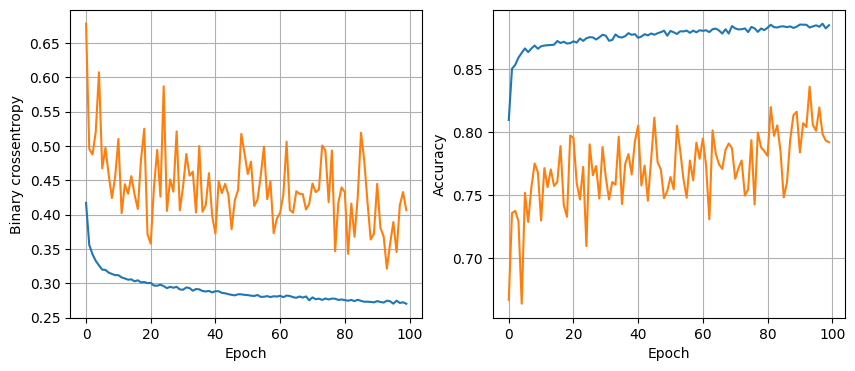

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8762 - loss: 0.3202
16 nodes, dropout 0, lr 0.01, batch size 128


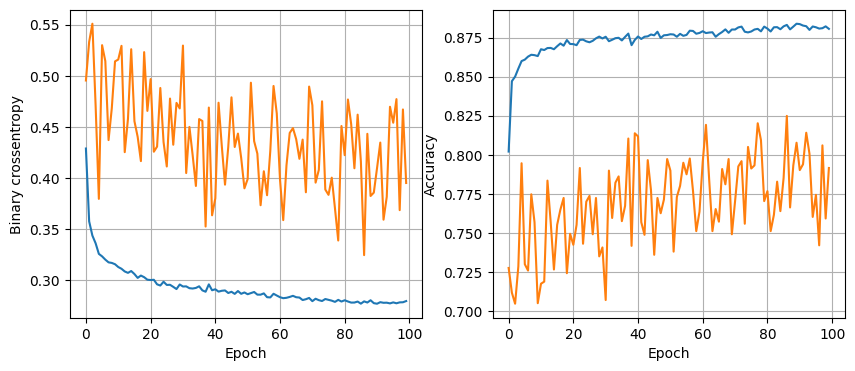

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8647 - loss: 0.3289
16 nodes, dropout 0, lr 0.005, batch size 32


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

In [ ]:
print(classification_report(y_test, y_pred))